In [2]:
import pandas as pd
import os
import pickle

In [3]:
from google.colab import drive
drive.mount("/content/drive")

os.chdir('/content/drive/MyDrive/SI 630 project')
# os.listdir('.')

Mounted at /content/drive


In [4]:
os.listdir('datasets/CADEC/CADEC.v2/cadec')


['sct',
 'text',
 'original - unedited version of edited files',
 'meddra - unedited version of edited files',
 'sct - unedited version of edited files',
 'original',
 'meddra']

In [5]:
suf = '_v3'

data_save_dir = 'data'+suf

suf += '_spanbert-large-cased'

In [6]:
meddra_counts = pd.read_csv(data_save_dir+'/meddra_counts.csv')
meddra_counts

,ner,meddra,counts_exploded,counts,counts_exploded_rank
0,Drug,Lipitor,1081,1073,1
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
...,...,...,...,...,...
1294,Finding,Senility,1,1,1233
1295,Drug,Seroquel,1,1,1233
1296,Drug,Solaraze,1,1,1233
1297,Drug,Tagamet,1,1,1233


In [7]:
meddra_counts.loc[meddra_counts.ner == 'ADR',:]

,ner,meddra,counts_exploded,counts,counts_exploded_rank
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
5,ADR,Arthralgia,280,163,6
...,...,...,...,...,...
1268,ADR,Labyrinthitis,1,1,1233
1269,ADR,Dysphagia,1,1,1233
1275,ADR,Lupus_erythematosus,1,1,1233
1278,ADR,Cataract,1,1,1233


In [8]:
with open(data_save_dir+'/cadec_flair_objects.pkl', 'rb') as f:
    docs = pickle.load(f)
docs[:10]

[Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/I-ADR/I-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/I-ADR/I-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/I-ADR/I-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/B-Drug/B-Arthrotec, "50"/O/O, "for"/O/O, "over"

In [9]:
len(docs)

1186

In [10]:
temp = docs[0]
temp

Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/I-ADR/I-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/I-ADR/I-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/I-ADR/I-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/B-Drug/B-Arthrotec, "50"/O/O, "for"/O/O, "over"/

In [11]:
temp.annotation_layers

{'ner': ['Token[0]: "i"'/'O' (1.0),
  'Token[1]: "feel"'/'O' (1.0),
  'Token[2]: "a"'/'O' (1.0),
  'Token[3]: "bit"'/'B-ADR' (1.0),
  'Token[4]: "drowsy"'/'I-ADR' (1.0),
  'Token[5]: "&"'/'O' (1.0),
  'Token[6]: "have"'/'O' (1.0),
  'Token[7]: "a"'/'O' (1.0),
  'Token[8]: "little"'/'B-ADR' (1.0),
  'Token[9]: "blurred"'/'I-ADR' (1.0),
  'Token[10]: "vision"'/'I-ADR' (1.0),
  'Token[11]: ","'/'O' (1.0),
  'Token[12]: "so"'/'O' (1.0),
  'Token[13]: "far"'/'O' (1.0),
  'Token[14]: "no"'/'O' (1.0),
  'Token[15]: "gastric"'/'B-ADR' (1.0),
  'Token[16]: "problems"'/'I-ADR' (1.0),
  'Token[17]: "."'/'O' (1.0),
  'Token[18]: "ive"'/'O' (1.0),
  'Token[19]: "been"'/'O' (1.0),
  'Token[20]: "on"'/'O' (1.0),
  'Token[21]: "arthrotec"'/'B-Drug' (1.0),
  'Token[22]: "50"'/'O' (1.0),
  'Token[23]: "for"'/'O' (1.0),
  'Token[24]: "over"'/'O' (1.0),
  'Token[25]: "10"'/'O' (1.0),
  'Token[26]: "years"'/'O' (1.0),
  'Token[27]: "on"'/'O' (1.0),
  'Token[28]: "and"'/'O' (1.0),
  'Token[29]: "off"'/'O' (

In [12]:

# define your NER tags
label_dict = {
    'ADR': 'ADR',
    'Drug': 'Drug',
    'Finding': 'Finding',
    'Symptom': 'Symptom',
    'Disease': 'Disease'
}

In [13]:
from flair.data import Corpus

from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings, TransformerWordEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from sklearn.model_selection import train_test_split

from torch.optim import AdamW, SGD

from flair.visual.training_curves import Plotter
plotter = Plotter()



train_docs, test_docs = train_test_split(docs, test_size=0.2, random_state=321)
dev_docs, test_docs = train_test_split(test_docs, test_size=0.5, random_state=123)

corpus = Corpus(train=train_docs, dev=dev_docs, test=test_docs) # Corpus: 948 train + 119 dev + 119 test sentences
corpus.filter_empty_sentences()
# # create a tag dictionary
labels = ['ADR', 'Drug', 'Finding', 'Symptom', 'Disease']
# tag_dictionary = Dictionary(add_unk=True)
# for label in labels:
#     tag_dictionary.add_item(label)
tag_dictionary = corpus.make_label_dictionary(label_type='ner')
print(tag_dictionary.span_labels)

# create a stacked embedding using GloVe and Flair embeddings
# stacked_embeddings = StackedEmbeddings([
#     WordEmbeddings('glove',
#                    force_cpu=False,
#                 #    embedding_length=1024,
#                   #  fine_tune=True,
#                    ),
#     # TransformerWordEmbeddings('emilyalsentzer/Bio_ClinicalBERT', layers="-1",
#     #                                    subtoken_pooling="first",
#     #                                    is_document_embedding=True,
#     #                                    fine_tune=True,
#     #                                    use_context=True,
#     #                                    max_seq_length=1024,
#     #                                    ),
#     FlairEmbeddings('news-forward',
#                     # fine_tune=True
#                     ),
#     FlairEmbeddings('news-backward',
#                     # fine_tune=True
#                     ),
# ])
# https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/FLAIR_EMBEDDINGS.md


embeddings = TransformerWordEmbeddings(model='SpanBERT/spanbert-large-cased',
                                       layers="-1",
                                       subtoken_pooling="first",
                                       fine_tune=True,
                                       use_context=True,
                                       force_max_length=True,
                                      #  truncate=True, # not accepted here
                                      # #  is_document_embedding=True, # False is default
                                      #  allow_long_sentences=True, # True is default; doesnt go through
                                      #  embedding_length=512,
                                       )
# embeddings.allow_long_sentences = False
embeddings.truncate = True
# embeddings.embedding_length_internal = 512
print(embeddings.force_max_length,embeddings.truncate,embeddings.allow_long_sentences,embeddings.embedding_length_internal)
embeddings.tokenizer.model_max_length=512
print(embeddings.to_args())
print(embeddings.tokenizer)


# create a SequenceTagger object and specify the tag dictionary and embeddings to use
tagger = SequenceTagger(hidden_size=256,
                        # embeddings=stacked_embeddings,
                        embeddings=embeddings,
                        tag_dictionary=tag_dictionary,
                        tag_type='ner',
                        use_crf=False,
                        use_rnn=False,
                        # reproject_embeddings=False
                        )
tagger.predict_spans = False

print(tagger._determine_if_span_prediction_problem(tagger.label_dictionary))
print(tagger.predict_spans)

# https://github.com/flairNLP/flair/blob/master/flair/trainers/trainer.py
# create a ModelTrainer object and train the tagger
trainer = ModelTrainer(tagger, corpus)

2023-04-21 16:14:12,236 Filtering empty sentences
2023-04-21 16:14:12,284 Corpus: 948 train + 119 dev + 119 test sentences
2023-04-21 16:14:12,285 Computing label dictionary. Progress:


948it [00:00, 6967.93it/s]

2023-04-21 16:14:12,426 Dictionary created for label 'ner' with 12 values: O (seen 79057 times), I-ADR (seen 7953 times), B-ADR (seen 4712 times), B-Drug (seen 1396 times), I-Finding (seen 349 times), B-Finding (seen 309 times), B-Disease (seen 231 times), B-Symptom (seen 222 times), I-Symptom (seen 218 times), I-Disease (seen 169 times), I-Drug (seen 161 times)
False


True True False 1024
{'is_token_embedding': True, 'is_document_embedding': False, 'allow_long_sentences': False, 'tokenizer': BertTokenizerFast(name_or_path='SpanBERT/spanbert-large-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]', 'additional_special_tokens': ['[FLERT]']}, clean_up_tokenization_spaces=True), 'context_length': 64, 'context_dropout': 0.5, 'respect_document_boundaries': True, 'truncate': True, 'stride': 0, 'embedding_length': 1024, 'name': 'transformer-SpanBERT/spanbert-large-cased', 'fine_tune': True, 'use_lang_emb': False, 'force_max_length': True, 'feature_extractor': None, 'use_context_separator': True, 'needs_manual_ocr': False}
BertTokenizerFast(name_or_path='SpanBERT/spanbert-large-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side=

In [14]:
# !tensorboard --logdir=runs
# http://localhost:6006/

In [15]:
hist = trainer.train('flair_ner_model'+suf,
              embeddings_storage_mode='gpu',
              gold_label_dictionary_for_eval=tag_dictionary,
              mini_batch_size = 15,
              eval_batch_size = 15,
              patience=1,
              anneal_factor = 0.5,
              anneal_against_dev_loss=True,
              main_evaluation_metric = ("weighted avg", "f1-score"),
              metrics_for_tensorboard=[("weighted avg", 'precision'), ("weighted avg", 'recall'), ("macro avg", 'f1-score'), ("macro avg", 'precision'), ("macro avg", 'recall')],
              use_tensorboard=True,
              tensorboard_comment='Flair NER',
              tensorboard_log_dir='runs/tb_logs'+suf,
              min_learning_rate=3e-8,
              optimizer=AdamW,
              learning_rate=5.0e-6,
              weight_decay=0.001,
              max_epochs=100,
              monitor_train=True,
              save_optimizer_state=True,)
# hist

2023-04-21 16:14:30,705 tensorboard logging path is runs/tb_logs_v3_spanbert-large-cased
2023-04-21 16:14:30,717 ----------------------------------------------------------------------------------------------------
2023-04-21 16:14:30,720 Model: "SequenceTagger(
  (embeddings): TransformerWordEmbeddings(
    (model): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(28997, 1024)
        (position_embeddings): Embedding(512, 1024)
        (token_type_embeddings): Embedding(2, 1024)
        (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0-23): 24 x BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=1024, out_features=1024, bias=True)
                (key): Linear(in_features=1024, out_features=1024, bias=True)
                

100%|██████████| 64/64 [00:25<00:00,  2.52it/s]


2023-04-21 16:16:09,324 Evaluating as a multi-label problem: True
2023-04-21 16:16:12,140 TRAIN : loss 0.986102819442749 - f1-score (weighted avg)  0.0


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 16:16:15,488 Evaluating as a multi-label problem: False
2023-04-21 16:16:15,550 DEV : loss 0.9820303320884705 - f1-score (weighted avg)  0.0
2023-04-21 16:16:15,570 BAD EPOCHS (no improvement): 0
2023-04-21 16:16:15,575 saving best model


2023-04-21 16:16:25,499 ----------------------------------------------------------------------------------------------------
2023-04-21 16:16:32,225 epoch 2 - iter 6/64 - loss 1.02124873 - time (sec): 6.72 - samples/sec: 1404.25 - lr: 0.000005
2023-04-21 16:16:38,876 epoch 2 - iter 12/64 - loss 0.99118074 - time (sec): 13.37 - samples/sec: 1359.43 - lr: 0.000005
2023-04-21 16:16:45,622 epoch 2 - iter 18/64 - loss 0.97102090 - time (sec): 20.12 - samples/sec: 1357.41 - lr: 0.000005
2023-04-21 16:16:52,339 epoch 2 - iter 24/64 - loss 0.95199718 - time (sec): 26.84 - samples/sec: 1419.82 - lr: 0.000005
2023-04-21 16:16:59,042 epoch 2 - iter 30/64 - loss 0.93875993 - time (sec): 33.54 - samples/sec: 1403.78 - lr: 0.000005
2023-04-21 16:17:05,690 epoch 2 - iter 36/64 - loss 0.93100102 - time (sec): 40.19 - samples/sec: 1384.59 - lr: 0.000005
2023-04-21 16:17:12,535 epoch 2 - iter 42/64 - loss 0.92977286 - time (sec): 47.03 - samples/sec: 1379.76 - lr: 0.000005
2023-04-21 16:17:19,270 epoch 

100%|██████████| 64/64 [00:24<00:00,  2.61it/s]


2023-04-21 16:18:00,768 Evaluating as a multi-label problem: True
2023-04-21 16:18:02,534 TRAIN : loss 0.7920640707015991 - f1-score (weighted avg)  0.0


100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

2023-04-21 16:18:05,853 Evaluating as a multi-label problem: False
2023-04-21 16:18:05,917 DEV : loss 0.789519190788269 - f1-score (weighted avg)  0.0
2023-04-21 16:18:05,936 BAD EPOCHS (no improvement): 0
2023-04-21 16:18:05,940 saving best model


2023-04-21 16:18:16,370 ----------------------------------------------------------------------------------------------------
2023-04-21 16:18:23,069 epoch 3 - iter 6/64 - loss 0.82206419 - time (sec): 6.70 - samples/sec: 1268.68 - lr: 0.000005
2023-04-21 16:18:29,735 epoch 3 - iter 12/64 - loss 0.78950553 - time (sec): 13.36 - samples/sec: 1316.00 - lr: 0.000005
2023-04-21 16:18:36,478 epoch 3 - iter 18/64 - loss 0.78792549 - time (sec): 20.11 - samples/sec: 1376.63 - lr: 0.000005
2023-04-21 16:18:43,163 epoch 3 - iter 24/64 - loss 0.78932312 - time (sec): 26.79 - samples/sec: 1394.60 - lr: 0.000005
2023-04-21 16:18:49,872 epoch 3 - iter 30/64 - loss 0.78388194 - time (sec): 33.50 - samples/sec: 1374.26 - lr: 0.000005
2023-04-21 16:18:56,548 epoch 3 - iter 36/64 - loss 0.77568084 - time (sec): 40.18 - samples/sec: 1358.39 - lr: 0.000005
2023-04-21 16:19:03,460 epoch 3 - iter 42/64 - loss 0.78260238 - time (sec): 47.09 - samples/sec: 1372.15 - lr: 0.000005
2023-04-21 16:19:10,190 epoch 

100%|██████████| 64/64 [00:25<00:00,  2.50it/s]


2023-04-21 16:19:52,853 Evaluating as a multi-label problem: True
2023-04-21 16:19:54,631 TRAIN : loss 0.6033528447151184 - f1-score (weighted avg)  0.0


100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

2023-04-21 16:19:57,995 Evaluating as a multi-label problem: False
2023-04-21 16:19:58,064 DEV : loss 0.6117203235626221 - f1-score (weighted avg)  0.0
2023-04-21 16:19:58,084 BAD EPOCHS (no improvement): 0
2023-04-21 16:19:58,088 saving best model


2023-04-21 16:20:10,941 ----------------------------------------------------------------------------------------------------
2023-04-21 16:20:17,630 epoch 4 - iter 6/64 - loss 0.59085915 - time (sec): 6.69 - samples/sec: 1397.01 - lr: 0.000005
2023-04-21 16:20:24,304 epoch 4 - iter 12/64 - loss 0.59013338 - time (sec): 13.36 - samples/sec: 1318.86 - lr: 0.000005
2023-04-21 16:20:31,039 epoch 4 - iter 18/64 - loss 0.58832346 - time (sec): 20.09 - samples/sec: 1334.62 - lr: 0.000005
2023-04-21 16:20:37,711 epoch 4 - iter 24/64 - loss 0.58472533 - time (sec): 26.77 - samples/sec: 1297.86 - lr: 0.000005
2023-04-21 16:20:44,587 epoch 4 - iter 30/64 - loss 0.58554434 - time (sec): 33.64 - samples/sec: 1321.47 - lr: 0.000005
2023-04-21 16:20:51,363 epoch 4 - iter 36/64 - loss 0.57470752 - time (sec): 40.42 - samples/sec: 1334.51 - lr: 0.000005
2023-04-21 16:20:59,080 epoch 4 - iter 42/64 - loss 0.56151367 - time (sec): 48.14 - samples/sec: 1306.06 - lr: 0.000005
2023-04-21 16:21:05,775 epoch 

100%|██████████| 64/64 [00:24<00:00,  2.59it/s]


2023-04-21 16:21:47,617 Evaluating as a multi-label problem: True
2023-04-21 16:21:50,536 TRAIN : loss 0.4731231927871704 - f1-score (weighted avg)  0.2689


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 16:21:53,888 Evaluating as a multi-label problem: False
2023-04-21 16:21:53,955 DEV : loss 0.48401886224746704 - f1-score (weighted avg)  0.2305
2023-04-21 16:21:53,975 BAD EPOCHS (no improvement): 0
2023-04-21 16:21:53,979 saving best model


2023-04-21 16:22:04,014 ----------------------------------------------------------------------------------------------------
2023-04-21 16:22:10,827 epoch 5 - iter 6/64 - loss 0.48387460 - time (sec): 6.81 - samples/sec: 1416.52 - lr: 0.000005
2023-04-21 16:22:17,486 epoch 5 - iter 12/64 - loss 0.48703173 - time (sec): 13.46 - samples/sec: 1347.44 - lr: 0.000005
2023-04-21 16:22:24,345 epoch 5 - iter 18/64 - loss 0.51018098 - time (sec): 20.32 - samples/sec: 1329.52 - lr: 0.000005
2023-04-21 16:22:31,019 epoch 5 - iter 24/64 - loss 0.49540422 - time (sec): 27.00 - samples/sec: 1345.27 - lr: 0.000005
2023-04-21 16:22:37,708 epoch 5 - iter 30/64 - loss 0.48186320 - time (sec): 33.69 - samples/sec: 1334.34 - lr: 0.000005
2023-04-21 16:22:44,357 epoch 5 - iter 36/64 - loss 0.47875044 - time (sec): 40.34 - samples/sec: 1298.95 - lr: 0.000005
2023-04-21 16:22:51,052 epoch 5 - iter 42/64 - loss 0.46854939 - time (sec): 47.03 - samples/sec: 1336.27 - lr: 0.000005
2023-04-21 16:22:57,700 epoch 

100%|██████████| 64/64 [00:24<00:00,  2.57it/s]


2023-04-21 16:23:39,731 Evaluating as a multi-label problem: True
2023-04-21 16:23:42,726 TRAIN : loss 0.3915712833404541 - f1-score (weighted avg)  0.2623


100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

2023-04-21 16:23:46,095 Evaluating as a multi-label problem: False
2023-04-21 16:23:46,161 DEV : loss 0.4178542196750641 - f1-score (weighted avg)  0.2197
2023-04-21 16:23:46,180 BAD EPOCHS (no improvement): 0
2023-04-21 16:23:46,191 saving best model


2023-04-21 16:23:55,733 ----------------------------------------------------------------------------------------------------
2023-04-21 16:24:02,562 epoch 6 - iter 6/64 - loss 0.42062308 - time (sec): 6.83 - samples/sec: 1520.50 - lr: 0.000005
2023-04-21 16:24:09,398 epoch 6 - iter 12/64 - loss 0.45656116 - time (sec): 13.66 - samples/sec: 1401.16 - lr: 0.000005
2023-04-21 16:24:16,143 epoch 6 - iter 18/64 - loss 0.43833915 - time (sec): 20.41 - samples/sec: 1355.41 - lr: 0.000005
2023-04-21 16:24:22,820 epoch 6 - iter 24/64 - loss 0.43237600 - time (sec): 27.08 - samples/sec: 1368.14 - lr: 0.000005
2023-04-21 16:24:29,485 epoch 6 - iter 30/64 - loss 0.41893171 - time (sec): 33.75 - samples/sec: 1348.56 - lr: 0.000005
2023-04-21 16:24:36,100 epoch 6 - iter 36/64 - loss 0.41627039 - time (sec): 40.36 - samples/sec: 1336.20 - lr: 0.000005
2023-04-21 16:24:42,856 epoch 6 - iter 42/64 - loss 0.40311162 - time (sec): 47.12 - samples/sec: 1365.23 - lr: 0.000005
2023-04-21 16:24:49,483 epoch 

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 16:25:31,294 Evaluating as a multi-label problem: True
2023-04-21 16:25:33,148 TRAIN : loss 0.3359929025173187 - f1-score (weighted avg)  0.4931


100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

2023-04-21 16:25:37,500 Evaluating as a multi-label problem: False
2023-04-21 16:25:37,568 DEV : loss 0.36398202180862427 - f1-score (weighted avg)  0.4463
2023-04-21 16:25:37,588 BAD EPOCHS (no improvement): 0
2023-04-21 16:25:37,592 saving best model


2023-04-21 16:25:47,571 ----------------------------------------------------------------------------------------------------
2023-04-21 16:25:54,350 epoch 7 - iter 6/64 - loss 0.33915135 - time (sec): 6.78 - samples/sec: 1304.40 - lr: 0.000005
2023-04-21 16:26:01,060 epoch 7 - iter 12/64 - loss 0.34563643 - time (sec): 13.49 - samples/sec: 1312.71 - lr: 0.000005
2023-04-21 16:26:07,727 epoch 7 - iter 18/64 - loss 0.32574829 - time (sec): 20.15 - samples/sec: 1365.42 - lr: 0.000005
2023-04-21 16:26:14,429 epoch 7 - iter 24/64 - loss 0.32989132 - time (sec): 26.86 - samples/sec: 1348.00 - lr: 0.000005
2023-04-21 16:26:21,309 epoch 7 - iter 30/64 - loss 0.34172968 - time (sec): 33.74 - samples/sec: 1378.30 - lr: 0.000005
2023-04-21 16:26:27,968 epoch 7 - iter 36/64 - loss 0.34393222 - time (sec): 40.39 - samples/sec: 1367.01 - lr: 0.000005
2023-04-21 16:26:34,743 epoch 7 - iter 42/64 - loss 0.34448502 - time (sec): 47.17 - samples/sec: 1365.53 - lr: 0.000005
2023-04-21 16:26:41,412 epoch 

100%|██████████| 64/64 [00:24<00:00,  2.59it/s]


2023-04-21 16:27:23,209 Evaluating as a multi-label problem: True
2023-04-21 16:27:26,213 TRAIN : loss 0.2824366092681885 - f1-score (weighted avg)  0.6824


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 16:27:29,563 Evaluating as a multi-label problem: False
2023-04-21 16:27:29,633 DEV : loss 0.34281811118125916 - f1-score (weighted avg)  0.6118
2023-04-21 16:27:29,653 BAD EPOCHS (no improvement): 0
2023-04-21 16:27:29,658 saving best model


2023-04-21 16:27:39,322 ----------------------------------------------------------------------------------------------------
2023-04-21 16:27:46,011 epoch 8 - iter 6/64 - loss 0.29162501 - time (sec): 6.69 - samples/sec: 1193.48 - lr: 0.000005
2023-04-21 16:27:52,880 epoch 8 - iter 12/64 - loss 0.32055089 - time (sec): 13.56 - samples/sec: 1373.42 - lr: 0.000005
2023-04-21 16:27:59,526 epoch 8 - iter 18/64 - loss 0.31171585 - time (sec): 20.20 - samples/sec: 1336.11 - lr: 0.000005
2023-04-21 16:28:06,162 epoch 8 - iter 24/64 - loss 0.30308458 - time (sec): 26.84 - samples/sec: 1307.22 - lr: 0.000005
2023-04-21 16:28:12,869 epoch 8 - iter 30/64 - loss 0.29787322 - time (sec): 33.55 - samples/sec: 1290.56 - lr: 0.000005
2023-04-21 16:28:19,559 epoch 8 - iter 36/64 - loss 0.29217527 - time (sec): 40.24 - samples/sec: 1305.65 - lr: 0.000005
2023-04-21 16:28:26,313 epoch 8 - iter 42/64 - loss 0.29152016 - time (sec): 46.99 - samples/sec: 1320.68 - lr: 0.000005
2023-04-21 16:28:32,989 epoch 

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 16:29:14,871 Evaluating as a multi-label problem: True
2023-04-21 16:29:17,928 TRAIN : loss 0.22873802483081818 - f1-score (weighted avg)  0.756


100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

2023-04-21 16:29:21,302 Evaluating as a multi-label problem: False
2023-04-21 16:29:21,369 DEV : loss 0.2969987094402313 - f1-score (weighted avg)  0.6678
2023-04-21 16:29:21,390 BAD EPOCHS (no improvement): 0
2023-04-21 16:29:21,394 saving best model


2023-04-21 16:29:31,045 ----------------------------------------------------------------------------------------------------
2023-04-21 16:29:37,781 epoch 9 - iter 6/64 - loss 0.24322404 - time (sec): 6.73 - samples/sec: 1257.05 - lr: 0.000005
2023-04-21 16:29:44,493 epoch 9 - iter 12/64 - loss 0.23312013 - time (sec): 13.45 - samples/sec: 1362.13 - lr: 0.000005
2023-04-21 16:29:51,272 epoch 9 - iter 18/64 - loss 0.25477403 - time (sec): 20.22 - samples/sec: 1398.14 - lr: 0.000005
2023-04-21 16:29:57,917 epoch 9 - iter 24/64 - loss 0.24904185 - time (sec): 26.87 - samples/sec: 1361.93 - lr: 0.000005
2023-04-21 16:30:04,591 epoch 9 - iter 30/64 - loss 0.24308796 - time (sec): 33.54 - samples/sec: 1340.05 - lr: 0.000005
2023-04-21 16:30:11,241 epoch 9 - iter 36/64 - loss 0.24021142 - time (sec): 40.19 - samples/sec: 1297.92 - lr: 0.000005
2023-04-21 16:30:17,907 epoch 9 - iter 42/64 - loss 0.24018979 - time (sec): 46.86 - samples/sec: 1298.02 - lr: 0.000005
2023-04-21 16:30:24,603 epoch 

100%|██████████| 64/64 [00:24<00:00,  2.59it/s]


2023-04-21 16:31:06,607 Evaluating as a multi-label problem: True
2023-04-21 16:31:09,719 TRAIN : loss 0.2051694542169571 - f1-score (weighted avg)  0.765


100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

2023-04-21 16:31:13,060 Evaluating as a multi-label problem: False
2023-04-21 16:31:13,130 DEV : loss 0.28591614961624146 - f1-score (weighted avg)  0.6742
2023-04-21 16:31:13,150 BAD EPOCHS (no improvement): 0
2023-04-21 16:31:13,154 saving best model


2023-04-21 16:31:23,449 ----------------------------------------------------------------------------------------------------
2023-04-21 16:31:30,334 epoch 10 - iter 6/64 - loss 0.31132309 - time (sec): 6.88 - samples/sec: 1376.19 - lr: 0.000005
2023-04-21 16:31:37,088 epoch 10 - iter 12/64 - loss 0.25054165 - time (sec): 13.64 - samples/sec: 1363.49 - lr: 0.000005
2023-04-21 16:31:43,777 epoch 10 - iter 18/64 - loss 0.23944902 - time (sec): 20.32 - samples/sec: 1330.40 - lr: 0.000005
2023-04-21 16:31:50,450 epoch 10 - iter 24/64 - loss 0.23209270 - time (sec): 27.00 - samples/sec: 1343.02 - lr: 0.000005
2023-04-21 16:31:57,141 epoch 10 - iter 30/64 - loss 0.22605316 - time (sec): 33.69 - samples/sec: 1324.54 - lr: 0.000005
2023-04-21 16:32:03,815 epoch 10 - iter 36/64 - loss 0.22325121 - time (sec): 40.36 - samples/sec: 1327.38 - lr: 0.000005
2023-04-21 16:32:10,527 epoch 10 - iter 42/64 - loss 0.22040914 - time (sec): 47.08 - samples/sec: 1353.81 - lr: 0.000005
2023-04-21 16:32:17,275

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 16:32:59,071 Evaluating as a multi-label problem: True
2023-04-21 16:33:00,948 TRAIN : loss 0.18524512648582458 - f1-score (weighted avg)  0.7765


100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

2023-04-21 16:33:05,278 Evaluating as a multi-label problem: False
2023-04-21 16:33:05,345 DEV : loss 0.27624422311782837 - f1-score (weighted avg)  0.6709
2023-04-21 16:33:05,365 BAD EPOCHS (no improvement): 0
2023-04-21 16:33:05,369 saving best model


2023-04-21 16:33:15,044 ----------------------------------------------------------------------------------------------------
2023-04-21 16:33:21,738 epoch 11 - iter 6/64 - loss 0.17849619 - time (sec): 6.69 - samples/sec: 1322.65 - lr: 0.000005
2023-04-21 16:33:28,564 epoch 11 - iter 12/64 - loss 0.23104621 - time (sec): 13.51 - samples/sec: 1313.35 - lr: 0.000005
2023-04-21 16:33:35,202 epoch 11 - iter 18/64 - loss 0.22965714 - time (sec): 20.15 - samples/sec: 1301.48 - lr: 0.000005
2023-04-21 16:33:41,895 epoch 11 - iter 24/64 - loss 0.21642853 - time (sec): 26.84 - samples/sec: 1299.65 - lr: 0.000005
2023-04-21 16:33:48,614 epoch 11 - iter 30/64 - loss 0.20578544 - time (sec): 33.56 - samples/sec: 1328.39 - lr: 0.000005
2023-04-21 16:33:55,283 epoch 11 - iter 36/64 - loss 0.20666714 - time (sec): 40.23 - samples/sec: 1326.70 - lr: 0.000005
2023-04-21 16:34:01,976 epoch 11 - iter 42/64 - loss 0.20537109 - time (sec): 46.92 - samples/sec: 1321.76 - lr: 0.000005
2023-04-21 16:34:08,679

100%|██████████| 64/64 [00:24<00:00,  2.59it/s]


2023-04-21 16:34:50,584 Evaluating as a multi-label problem: True
2023-04-21 16:34:53,655 TRAIN : loss 0.17494212090969086 - f1-score (weighted avg)  0.7798


100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

2023-04-21 16:34:57,014 Evaluating as a multi-label problem: False
2023-04-21 16:34:57,081 DEV : loss 0.28348758816719055 - f1-score (weighted avg)  0.6675
2023-04-21 16:34:57,101 BAD EPOCHS (no improvement): 1
2023-04-21 16:34:57,105 ----------------------------------------------------------------------------------------------------


2023-04-21 16:35:03,739 epoch 12 - iter 6/64 - loss 0.16655283 - time (sec): 6.63 - samples/sec: 1290.91 - lr: 0.000005
2023-04-21 16:35:10,385 epoch 12 - iter 12/64 - loss 0.15889231 - time (sec): 13.28 - samples/sec: 1299.35 - lr: 0.000005
2023-04-21 16:35:17,028 epoch 12 - iter 18/64 - loss 0.16102441 - time (sec): 19.92 - samples/sec: 1268.32 - lr: 0.000005
2023-04-21 16:35:23,683 epoch 12 - iter 24/64 - loss 0.16609287 - time (sec): 26.58 - samples/sec: 1298.72 - lr: 0.000005
2023-04-21 16:35:30,464 epoch 12 - iter 30/64 - loss 0.18800130 - time (sec): 33.36 - samples/sec: 1291.87 - lr: 0.000005
2023-04-21 16:35:37,130 epoch 12 - iter 36/64 - loss 0.18744623 - time (sec): 40.02 - samples/sec: 1315.19 - lr: 0.000005
2023-04-21 16:35:43,838 epoch 12 - iter 42/64 - loss 0.18313862 - time (sec): 46.73 - samples/sec: 1340.79 - lr: 0.000005
2023-04-21 16:35:50,553 epoch 12 - iter 48/64 - loss 0.18016474 - time (sec): 53.45 - samples/sec: 1349.10 - lr: 0.000005
2023-04-21 16:35:57,325 ep

100%|██████████| 64/64 [00:24<00:00,  2.61it/s]


2023-04-21 16:36:32,295 Evaluating as a multi-label problem: True
2023-04-21 16:36:35,274 TRAIN : loss 0.1551417112350464 - f1-score (weighted avg)  0.7958


100%|██████████| 8/8 [00:03<00:00,  2.52it/s]

2023-04-21 16:36:38,607 Evaluating as a multi-label problem: False
2023-04-21 16:36:38,677 DEV : loss 0.28231310844421387 - f1-score (weighted avg)  0.6707
2023-04-21 16:36:38,697 Epoch    12: reducing learning rate of group 0 to 2.5000e-06.
2023-04-21 16:36:38,700 BAD EPOCHS (no improvement): 2
2023-04-21 16:36:38,703 ----------------------------------------------------------------------------------------------------


2023-04-21 16:36:45,327 epoch 13 - iter 6/64 - loss 0.15371794 - time (sec): 6.62 - samples/sec: 1266.23 - lr: 0.000003
2023-04-21 16:36:52,001 epoch 13 - iter 12/64 - loss 0.14452136 - time (sec): 13.30 - samples/sec: 1257.68 - lr: 0.000003
2023-04-21 16:36:58,884 epoch 13 - iter 18/64 - loss 0.18813026 - time (sec): 20.18 - samples/sec: 1335.21 - lr: 0.000003
2023-04-21 16:37:05,625 epoch 13 - iter 24/64 - loss 0.18360342 - time (sec): 26.92 - samples/sec: 1334.92 - lr: 0.000003
2023-04-21 16:37:12,309 epoch 13 - iter 30/64 - loss 0.17950281 - time (sec): 33.60 - samples/sec: 1349.18 - lr: 0.000003
2023-04-21 16:37:18,986 epoch 13 - iter 36/64 - loss 0.17699626 - time (sec): 40.28 - samples/sec: 1343.40 - lr: 0.000003
2023-04-21 16:37:25,626 epoch 13 - iter 42/64 - loss 0.17226640 - time (sec): 46.92 - samples/sec: 1312.36 - lr: 0.000003
2023-04-21 16:37:32,331 epoch 13 - iter 48/64 - loss 0.16847660 - time (sec): 53.63 - samples/sec: 1338.68 - lr: 0.000003
2023-04-21 16:37:38,984 ep

100%|██████████| 64/64 [00:24<00:00,  2.61it/s]


2023-04-21 16:38:13,913 Evaluating as a multi-label problem: True
2023-04-21 16:38:15,771 TRAIN : loss 0.14666293561458588 - f1-score (weighted avg)  0.8002


100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

2023-04-21 16:38:20,098 Evaluating as a multi-label problem: False
2023-04-21 16:38:20,169 DEV : loss 0.2791156768798828 - f1-score (weighted avg)  0.6701
2023-04-21 16:38:20,189 BAD EPOCHS (no improvement): 1
2023-04-21 16:38:20,194 ----------------------------------------------------------------------------------------------------


2023-04-21 16:38:26,857 epoch 14 - iter 6/64 - loss 0.16854351 - time (sec): 6.66 - samples/sec: 1295.74 - lr: 0.000003
2023-04-21 16:38:33,544 epoch 14 - iter 12/64 - loss 0.16038858 - time (sec): 13.35 - samples/sec: 1395.50 - lr: 0.000003
2023-04-21 16:38:40,235 epoch 14 - iter 18/64 - loss 0.15516017 - time (sec): 20.04 - samples/sec: 1375.03 - lr: 0.000003
2023-04-21 16:38:46,884 epoch 14 - iter 24/64 - loss 0.14675110 - time (sec): 26.69 - samples/sec: 1363.91 - lr: 0.000003
2023-04-21 16:38:53,564 epoch 14 - iter 30/64 - loss 0.15281822 - time (sec): 33.37 - samples/sec: 1340.09 - lr: 0.000003
2023-04-21 16:39:00,203 epoch 14 - iter 36/64 - loss 0.15268251 - time (sec): 40.01 - samples/sec: 1319.87 - lr: 0.000003
2023-04-21 16:39:06,892 epoch 14 - iter 42/64 - loss 0.14860270 - time (sec): 46.70 - samples/sec: 1342.55 - lr: 0.000003
2023-04-21 16:39:13,537 epoch 14 - iter 48/64 - loss 0.14802584 - time (sec): 53.34 - samples/sec: 1327.67 - lr: 0.000003
2023-04-21 16:39:20,327 ep

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 16:39:55,492 Evaluating as a multi-label problem: True
2023-04-21 16:39:58,487 TRAIN : loss 0.13808199763298035 - f1-score (weighted avg)  0.8144


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 16:40:01,838 Evaluating as a multi-label problem: False
2023-04-21 16:40:01,906 DEV : loss 0.27454912662506104 - f1-score (weighted avg)  0.6813
2023-04-21 16:40:01,925 BAD EPOCHS (no improvement): 0
2023-04-21 16:40:01,929 saving best model


2023-04-21 16:40:11,708 ----------------------------------------------------------------------------------------------------
2023-04-21 16:40:18,600 epoch 15 - iter 6/64 - loss 0.25809613 - time (sec): 6.89 - samples/sec: 1373.33 - lr: 0.000003
2023-04-21 16:40:25,359 epoch 15 - iter 12/64 - loss 0.21511999 - time (sec): 13.64 - samples/sec: 1386.18 - lr: 0.000003
2023-04-21 16:40:32,029 epoch 15 - iter 18/64 - loss 0.18196942 - time (sec): 20.31 - samples/sec: 1404.38 - lr: 0.000003
2023-04-21 16:40:38,714 epoch 15 - iter 24/64 - loss 0.17168870 - time (sec): 27.00 - samples/sec: 1397.56 - lr: 0.000003
2023-04-21 16:40:45,410 epoch 15 - iter 30/64 - loss 0.16378225 - time (sec): 33.70 - samples/sec: 1385.48 - lr: 0.000003
2023-04-21 16:40:52,051 epoch 15 - iter 36/64 - loss 0.16311372 - time (sec): 40.34 - samples/sec: 1349.40 - lr: 0.000003
2023-04-21 16:40:58,773 epoch 15 - iter 42/64 - loss 0.16049274 - time (sec): 47.06 - samples/sec: 1379.47 - lr: 0.000003
2023-04-21 16:41:05,431

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 16:41:47,189 Evaluating as a multi-label problem: True
2023-04-21 16:41:50,245 TRAIN : loss 0.13684611022472382 - f1-score (weighted avg)  0.821


100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

2023-04-21 16:41:53,618 Evaluating as a multi-label problem: False
2023-04-21 16:41:53,690 DEV : loss 0.2791268229484558 - f1-score (weighted avg)  0.6844
2023-04-21 16:41:53,710 BAD EPOCHS (no improvement): 1
2023-04-21 16:41:53,715 ----------------------------------------------------------------------------------------------------


2023-04-21 16:42:00,424 epoch 16 - iter 6/64 - loss 0.13485861 - time (sec): 6.71 - samples/sec: 1357.05 - lr: 0.000003
2023-04-21 16:42:07,079 epoch 16 - iter 12/64 - loss 0.13241487 - time (sec): 13.36 - samples/sec: 1317.05 - lr: 0.000003
2023-04-21 16:42:13,930 epoch 16 - iter 18/64 - loss 0.16133217 - time (sec): 20.21 - samples/sec: 1367.37 - lr: 0.000003
2023-04-21 16:42:20,608 epoch 16 - iter 24/64 - loss 0.15338556 - time (sec): 26.89 - samples/sec: 1390.25 - lr: 0.000003
2023-04-21 16:42:27,269 epoch 16 - iter 30/64 - loss 0.14789256 - time (sec): 33.55 - samples/sec: 1405.89 - lr: 0.000003
2023-04-21 16:42:33,995 epoch 16 - iter 36/64 - loss 0.14357286 - time (sec): 40.28 - samples/sec: 1396.24 - lr: 0.000003
2023-04-21 16:42:40,662 epoch 16 - iter 42/64 - loss 0.14275077 - time (sec): 46.95 - samples/sec: 1380.99 - lr: 0.000003
2023-04-21 16:42:47,322 epoch 16 - iter 48/64 - loss 0.14472441 - time (sec): 53.61 - samples/sec: 1370.06 - lr: 0.000003
2023-04-21 16:42:54,039 ep

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 16:43:29,067 Evaluating as a multi-label problem: True
2023-04-21 16:43:32,119 TRAIN : loss 0.1278633177280426 - f1-score (weighted avg)  0.8347


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 16:43:35,464 Evaluating as a multi-label problem: False
2023-04-21 16:43:35,532 DEV : loss 0.27127304673194885 - f1-score (weighted avg)  0.6884
2023-04-21 16:43:35,552 BAD EPOCHS (no improvement): 0
2023-04-21 16:43:35,557 saving best model


2023-04-21 16:43:45,037 ----------------------------------------------------------------------------------------------------
2023-04-21 16:43:51,974 epoch 17 - iter 6/64 - loss 0.23419236 - time (sec): 6.93 - samples/sec: 1338.50 - lr: 0.000003
2023-04-21 16:43:58,624 epoch 17 - iter 12/64 - loss 0.18721365 - time (sec): 13.59 - samples/sec: 1368.05 - lr: 0.000003
2023-04-21 16:44:05,307 epoch 17 - iter 18/64 - loss 0.16879814 - time (sec): 20.27 - samples/sec: 1339.28 - lr: 0.000003
2023-04-21 16:44:11,942 epoch 17 - iter 24/64 - loss 0.15770108 - time (sec): 26.90 - samples/sec: 1333.04 - lr: 0.000003
2023-04-21 16:44:18,601 epoch 17 - iter 30/64 - loss 0.15333381 - time (sec): 33.56 - samples/sec: 1337.03 - lr: 0.000003
2023-04-21 16:44:25,218 epoch 17 - iter 36/64 - loss 0.14548694 - time (sec): 40.18 - samples/sec: 1304.58 - lr: 0.000003
2023-04-21 16:44:32,010 epoch 17 - iter 42/64 - loss 0.14757517 - time (sec): 46.97 - samples/sec: 1348.04 - lr: 0.000003
2023-04-21 16:44:38,678

100%|██████████| 64/64 [00:24<00:00,  2.59it/s]


2023-04-21 16:45:20,531 Evaluating as a multi-label problem: True
2023-04-21 16:45:23,661 TRAIN : loss 0.12029071152210236 - f1-score (weighted avg)  0.8477


100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

2023-04-21 16:45:27,039 Evaluating as a multi-label problem: False
2023-04-21 16:45:27,108 DEV : loss 0.2804987132549286 - f1-score (weighted avg)  0.7005
2023-04-21 16:45:27,128 BAD EPOCHS (no improvement): 1
2023-04-21 16:45:27,132 ----------------------------------------------------------------------------------------------------


2023-04-21 16:45:33,787 epoch 18 - iter 6/64 - loss 0.13566914 - time (sec): 6.65 - samples/sec: 1293.10 - lr: 0.000003
2023-04-21 16:45:40,455 epoch 18 - iter 12/64 - loss 0.12636799 - time (sec): 13.32 - samples/sec: 1381.24 - lr: 0.000003
2023-04-21 16:45:47,091 epoch 18 - iter 18/64 - loss 0.12493610 - time (sec): 19.96 - samples/sec: 1324.73 - lr: 0.000003
2023-04-21 16:45:53,779 epoch 18 - iter 24/64 - loss 0.13271208 - time (sec): 26.65 - samples/sec: 1303.65 - lr: 0.000003
2023-04-21 16:46:00,453 epoch 18 - iter 30/64 - loss 0.12726090 - time (sec): 33.32 - samples/sec: 1302.73 - lr: 0.000003
2023-04-21 16:46:07,165 epoch 18 - iter 36/64 - loss 0.12746612 - time (sec): 40.03 - samples/sec: 1340.50 - lr: 0.000003
2023-04-21 16:46:13,886 epoch 18 - iter 42/64 - loss 0.12673775 - time (sec): 46.75 - samples/sec: 1364.02 - lr: 0.000003
2023-04-21 16:46:20,635 epoch 18 - iter 48/64 - loss 0.12896263 - time (sec): 53.50 - samples/sec: 1376.48 - lr: 0.000003
2023-04-21 16:46:27,329 ep

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 16:47:02,418 Evaluating as a multi-label problem: True
2023-04-21 16:47:04,276 TRAIN : loss 0.11911486089229584 - f1-score (weighted avg)  0.8467


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 16:47:07,628 Evaluating as a multi-label problem: False
2023-04-21 16:47:07,697 DEV : loss 0.27640819549560547 - f1-score (weighted avg)  0.6961
2023-04-21 16:47:07,718 Epoch    18: reducing learning rate of group 0 to 1.2500e-06.
2023-04-21 16:47:07,720 BAD EPOCHS (no improvement): 2
2023-04-21 16:47:07,724 ----------------------------------------------------------------------------------------------------


2023-04-21 16:47:14,361 epoch 19 - iter 6/64 - loss 0.11779804 - time (sec): 6.64 - samples/sec: 1335.24 - lr: 0.000001
2023-04-21 16:47:21,015 epoch 19 - iter 12/64 - loss 0.10503245 - time (sec): 13.29 - samples/sec: 1326.52 - lr: 0.000001
2023-04-21 16:47:27,674 epoch 19 - iter 18/64 - loss 0.10003574 - time (sec): 19.95 - samples/sec: 1296.19 - lr: 0.000001
2023-04-21 16:47:34,525 epoch 19 - iter 24/64 - loss 0.12889518 - time (sec): 26.80 - samples/sec: 1317.06 - lr: 0.000001
2023-04-21 16:47:41,177 epoch 19 - iter 30/64 - loss 0.12781542 - time (sec): 33.45 - samples/sec: 1321.31 - lr: 0.000001
2023-04-21 16:47:47,894 epoch 19 - iter 36/64 - loss 0.13358979 - time (sec): 40.17 - samples/sec: 1309.57 - lr: 0.000001
2023-04-21 16:47:54,640 epoch 19 - iter 42/64 - loss 0.13323280 - time (sec): 46.91 - samples/sec: 1333.76 - lr: 0.000001
2023-04-21 16:48:01,295 epoch 19 - iter 48/64 - loss 0.13421649 - time (sec): 53.57 - samples/sec: 1327.39 - lr: 0.000001
2023-04-21 16:48:08,017 ep

100%|██████████| 64/64 [00:25<00:00,  2.50it/s]


2023-04-21 16:48:43,967 Evaluating as a multi-label problem: True
2023-04-21 16:48:46,989 TRAIN : loss 0.11433394998311996 - f1-score (weighted avg)  0.8531


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 16:48:50,346 Evaluating as a multi-label problem: False
2023-04-21 16:48:50,415 DEV : loss 0.2814003527164459 - f1-score (weighted avg)  0.7016
2023-04-21 16:48:50,435 BAD EPOCHS (no improvement): 1
2023-04-21 16:48:50,439 ----------------------------------------------------------------------------------------------------


2023-04-21 16:48:57,241 epoch 20 - iter 6/64 - loss 0.19304028 - time (sec): 6.80 - samples/sec: 1315.78 - lr: 0.000001
2023-04-21 16:49:03,966 epoch 20 - iter 12/64 - loss 0.14790577 - time (sec): 13.53 - samples/sec: 1417.74 - lr: 0.000001
2023-04-21 16:49:10,730 epoch 20 - iter 18/64 - loss 0.14425667 - time (sec): 20.29 - samples/sec: 1381.56 - lr: 0.000001
2023-04-21 16:49:17,393 epoch 20 - iter 24/64 - loss 0.14413156 - time (sec): 26.95 - samples/sec: 1383.06 - lr: 0.000001
2023-04-21 16:49:24,071 epoch 20 - iter 30/64 - loss 0.13421705 - time (sec): 33.63 - samples/sec: 1364.97 - lr: 0.000001
2023-04-21 16:49:30,759 epoch 20 - iter 36/64 - loss 0.13013312 - time (sec): 40.32 - samples/sec: 1390.72 - lr: 0.000001
2023-04-21 16:49:37,423 epoch 20 - iter 42/64 - loss 0.12826924 - time (sec): 46.98 - samples/sec: 1397.29 - lr: 0.000001
2023-04-21 16:49:44,065 epoch 20 - iter 48/64 - loss 0.12955727 - time (sec): 53.62 - samples/sec: 1365.50 - lr: 0.000001
2023-04-21 16:49:50,687 ep

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 16:50:25,708 Evaluating as a multi-label problem: True
2023-04-21 16:50:27,555 TRAIN : loss 0.11076810210943222 - f1-score (weighted avg)  0.8601


100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

2023-04-21 16:50:31,888 Evaluating as a multi-label problem: False
2023-04-21 16:50:31,956 DEV : loss 0.28186070919036865 - f1-score (weighted avg)  0.704
2023-04-21 16:50:31,976 Epoch    20: reducing learning rate of group 0 to 6.2500e-07.
2023-04-21 16:50:31,978 BAD EPOCHS (no improvement): 2
2023-04-21 16:50:31,981 ----------------------------------------------------------------------------------------------------


2023-04-21 16:50:38,634 epoch 21 - iter 6/64 - loss 0.11020954 - time (sec): 6.65 - samples/sec: 1266.38 - lr: 0.000001
2023-04-21 16:50:45,320 epoch 21 - iter 12/64 - loss 0.10298137 - time (sec): 13.34 - samples/sec: 1392.14 - lr: 0.000001
2023-04-21 16:50:52,028 epoch 21 - iter 18/64 - loss 0.10399261 - time (sec): 20.04 - samples/sec: 1425.51 - lr: 0.000001
2023-04-21 16:50:58,794 epoch 21 - iter 24/64 - loss 0.11209736 - time (sec): 26.81 - samples/sec: 1448.53 - lr: 0.000001
2023-04-21 16:51:05,456 epoch 21 - iter 30/64 - loss 0.11231287 - time (sec): 33.47 - samples/sec: 1414.38 - lr: 0.000001
2023-04-21 16:51:12,091 epoch 21 - iter 36/64 - loss 0.11309457 - time (sec): 40.11 - samples/sec: 1374.07 - lr: 0.000001
2023-04-21 16:51:18,727 epoch 21 - iter 42/64 - loss 0.11435523 - time (sec): 46.74 - samples/sec: 1365.71 - lr: 0.000001
2023-04-21 16:51:25,449 epoch 21 - iter 48/64 - loss 0.11506922 - time (sec): 53.47 - samples/sec: 1357.25 - lr: 0.000001
2023-04-21 16:51:32,261 ep

100%|██████████| 64/64 [00:24<00:00,  2.61it/s]


2023-04-21 16:52:07,170 Evaluating as a multi-label problem: True
2023-04-21 16:52:10,181 TRAIN : loss 0.11049961298704147 - f1-score (weighted avg)  0.8597


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 16:52:13,534 Evaluating as a multi-label problem: False
2023-04-21 16:52:13,603 DEV : loss 0.2817040979862213 - f1-score (weighted avg)  0.7029
2023-04-21 16:52:13,623 BAD EPOCHS (no improvement): 1
2023-04-21 16:52:13,627 ----------------------------------------------------------------------------------------------------


2023-04-21 16:52:20,370 epoch 22 - iter 6/64 - loss 0.15216067 - time (sec): 6.74 - samples/sec: 1374.14 - lr: 0.000001
2023-04-21 16:52:27,032 epoch 22 - iter 12/64 - loss 0.12989971 - time (sec): 13.40 - samples/sec: 1330.50 - lr: 0.000001
2023-04-21 16:52:33,720 epoch 22 - iter 18/64 - loss 0.12107836 - time (sec): 20.09 - samples/sec: 1305.40 - lr: 0.000001
2023-04-21 16:52:40,365 epoch 22 - iter 24/64 - loss 0.11740731 - time (sec): 26.74 - samples/sec: 1313.50 - lr: 0.000001
2023-04-21 16:52:47,058 epoch 22 - iter 30/64 - loss 0.11468640 - time (sec): 33.43 - samples/sec: 1346.55 - lr: 0.000001
2023-04-21 16:52:53,741 epoch 22 - iter 36/64 - loss 0.11457861 - time (sec): 40.11 - samples/sec: 1372.07 - lr: 0.000001
2023-04-21 16:53:00,425 epoch 22 - iter 42/64 - loss 0.11245723 - time (sec): 46.80 - samples/sec: 1371.16 - lr: 0.000001
2023-04-21 16:53:07,136 epoch 22 - iter 48/64 - loss 0.11300231 - time (sec): 53.51 - samples/sec: 1356.51 - lr: 0.000001
2023-04-21 16:53:13,767 ep

100%|██████████| 64/64 [00:24<00:00,  2.61it/s]


2023-04-21 16:53:48,879 Evaluating as a multi-label problem: True
2023-04-21 16:53:51,903 TRAIN : loss 0.109440378844738 - f1-score (weighted avg)  0.8593


100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

2023-04-21 16:53:55,248 Evaluating as a multi-label problem: False
2023-04-21 16:53:55,315 DEV : loss 0.2849375903606415 - f1-score (weighted avg)  0.7011
2023-04-21 16:53:55,334 Epoch    22: reducing learning rate of group 0 to 3.1250e-07.
2023-04-21 16:53:55,336 BAD EPOCHS (no improvement): 2
2023-04-21 16:53:55,340 ----------------------------------------------------------------------------------------------------


2023-04-21 16:54:01,985 epoch 23 - iter 6/64 - loss 0.08704830 - time (sec): 6.64 - samples/sec: 1214.51 - lr: 0.000000
2023-04-21 16:54:08,894 epoch 23 - iter 12/64 - loss 0.18030803 - time (sec): 13.55 - samples/sec: 1341.98 - lr: 0.000000
2023-04-21 16:54:15,528 epoch 23 - iter 18/64 - loss 0.16566359 - time (sec): 20.19 - samples/sec: 1342.43 - lr: 0.000000
2023-04-21 16:54:22,199 epoch 23 - iter 24/64 - loss 0.15122513 - time (sec): 26.86 - samples/sec: 1353.14 - lr: 0.000000
2023-04-21 16:54:28,908 epoch 23 - iter 30/64 - loss 0.14515781 - time (sec): 33.57 - samples/sec: 1352.75 - lr: 0.000000
2023-04-21 16:54:35,573 epoch 23 - iter 36/64 - loss 0.13967027 - time (sec): 40.23 - samples/sec: 1354.23 - lr: 0.000000
2023-04-21 16:54:42,217 epoch 23 - iter 42/64 - loss 0.13566152 - time (sec): 46.88 - samples/sec: 1344.09 - lr: 0.000000
2023-04-21 16:54:48,920 epoch 23 - iter 48/64 - loss 0.13359079 - time (sec): 53.58 - samples/sec: 1348.18 - lr: 0.000000
2023-04-21 16:54:55,552 ep

100%|██████████| 64/64 [00:24<00:00,  2.61it/s]


2023-04-21 16:55:30,516 Evaluating as a multi-label problem: True
2023-04-21 16:55:33,525 TRAIN : loss 0.10914214700460434 - f1-score (weighted avg)  0.8594


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 16:55:36,877 Evaluating as a multi-label problem: False
2023-04-21 16:55:36,946 DEV : loss 0.2851102352142334 - f1-score (weighted avg)  0.7027
2023-04-21 16:55:36,965 BAD EPOCHS (no improvement): 1
2023-04-21 16:55:36,969 ----------------------------------------------------------------------------------------------------


2023-04-21 16:55:43,645 epoch 24 - iter 6/64 - loss 0.11515855 - time (sec): 6.68 - samples/sec: 1300.67 - lr: 0.000000
2023-04-21 16:55:50,328 epoch 24 - iter 12/64 - loss 0.10362051 - time (sec): 13.36 - samples/sec: 1307.07 - lr: 0.000000
2023-04-21 16:55:56,970 epoch 24 - iter 18/64 - loss 0.10372403 - time (sec): 20.00 - samples/sec: 1297.60 - lr: 0.000000
2023-04-21 16:56:03,708 epoch 24 - iter 24/64 - loss 0.10494026 - time (sec): 26.74 - samples/sec: 1338.16 - lr: 0.000000
2023-04-21 16:56:10,360 epoch 24 - iter 30/64 - loss 0.11074958 - time (sec): 33.39 - samples/sec: 1330.26 - lr: 0.000000
2023-04-21 16:56:17,020 epoch 24 - iter 36/64 - loss 0.11292903 - time (sec): 40.05 - samples/sec: 1354.49 - lr: 0.000000
2023-04-21 16:56:23,682 epoch 24 - iter 42/64 - loss 0.11312846 - time (sec): 46.71 - samples/sec: 1356.06 - lr: 0.000000
2023-04-21 16:56:30,337 epoch 24 - iter 48/64 - loss 0.11307861 - time (sec): 53.37 - samples/sec: 1342.79 - lr: 0.000000
2023-04-21 16:56:36,974 ep

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 16:57:12,233 Evaluating as a multi-label problem: True
2023-04-21 16:57:14,090 TRAIN : loss 0.10843140631914139 - f1-score (weighted avg)  0.8613


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]


2023-04-21 16:57:18,471 Evaluating as a multi-label problem: False
2023-04-21 16:57:18,541 DEV : loss 0.2850811779499054 - f1-score (weighted avg)  0.7
2023-04-21 16:57:18,561 Epoch    24: reducing learning rate of group 0 to 1.5625e-07.
2023-04-21 16:57:18,563 BAD EPOCHS (no improvement): 2
2023-04-21 16:57:18,567 ----------------------------------------------------------------------------------------------------
2023-04-21 16:57:25,195 epoch 25 - iter 6/64 - loss 0.11613097 - time (sec): 6.63 - samples/sec: 1300.64 - lr: 0.000000
2023-04-21 16:57:31,882 epoch 25 - iter 12/64 - loss 0.11772462 - time (sec): 13.31 - samples/sec: 1365.71 - lr: 0.000000
2023-04-21 16:57:38,513 epoch 25 - iter 18/64 - loss 0.11733645 - time (sec): 19.94 - samples/sec: 1291.82 - lr: 0.000000
2023-04-21 16:57:45,141 epoch 25 - iter 24/64 - loss 0.11512328 - time (sec): 26.57 - samples/sec: 1262.44 - lr: 0.000000
2023-04-21 16:57:51,836 epoch 25 - iter 30/64 - loss 0.11237022 - time (sec): 33.27 - samples/se

100%|██████████| 64/64 [00:24<00:00,  2.61it/s]


2023-04-21 16:58:53,770 Evaluating as a multi-label problem: True
2023-04-21 16:58:56,770 TRAIN : loss 0.10815412551164627 - f1-score (weighted avg)  0.8606


100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

2023-04-21 16:59:00,145 Evaluating as a multi-label problem: False
2023-04-21 16:59:00,212 DEV : loss 0.28329312801361084 - f1-score (weighted avg)  0.7032
2023-04-21 16:59:00,232 BAD EPOCHS (no improvement): 1
2023-04-21 16:59:00,236 ----------------------------------------------------------------------------------------------------


2023-04-21 16:59:06,886 epoch 26 - iter 6/64 - loss 0.11654737 - time (sec): 6.65 - samples/sec: 1304.63 - lr: 0.000000
2023-04-21 16:59:13,553 epoch 26 - iter 12/64 - loss 0.10983926 - time (sec): 13.32 - samples/sec: 1379.64 - lr: 0.000000
2023-04-21 16:59:20,167 epoch 26 - iter 18/64 - loss 0.10718921 - time (sec): 19.93 - samples/sec: 1304.84 - lr: 0.000000
2023-04-21 16:59:26,963 epoch 26 - iter 24/64 - loss 0.12936098 - time (sec): 26.73 - samples/sec: 1301.97 - lr: 0.000000
2023-04-21 16:59:33,601 epoch 26 - iter 30/64 - loss 0.12312775 - time (sec): 33.36 - samples/sec: 1314.38 - lr: 0.000000
2023-04-21 16:59:40,381 epoch 26 - iter 36/64 - loss 0.12476262 - time (sec): 40.14 - samples/sec: 1315.86 - lr: 0.000000
2023-04-21 16:59:47,087 epoch 26 - iter 42/64 - loss 0.12314300 - time (sec): 46.85 - samples/sec: 1332.88 - lr: 0.000000
2023-04-21 16:59:53,760 epoch 26 - iter 48/64 - loss 0.12080410 - time (sec): 53.52 - samples/sec: 1337.34 - lr: 0.000000
2023-04-21 17:00:00,408 ep

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 17:00:35,420 Evaluating as a multi-label problem: True
2023-04-21 17:00:38,439 TRAIN : loss 0.10728350281715393 - f1-score (weighted avg)  0.8623


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 17:00:41,791 Evaluating as a multi-label problem: False
2023-04-21 17:00:41,861 DEV : loss 0.2841992974281311 - f1-score (weighted avg)  0.7033
2023-04-21 17:00:41,881 Epoch    26: reducing learning rate of group 0 to 7.8125e-08.
2023-04-21 17:00:41,883 BAD EPOCHS (no improvement): 2
2023-04-21 17:00:41,886 ----------------------------------------------------------------------------------------------------


2023-04-21 17:00:48,500 epoch 27 - iter 6/64 - loss 0.09957168 - time (sec): 6.61 - samples/sec: 1279.50 - lr: 0.000000
2023-04-21 17:00:55,209 epoch 27 - iter 12/64 - loss 0.11173736 - time (sec): 13.32 - samples/sec: 1286.32 - lr: 0.000000
2023-04-21 17:01:01,890 epoch 27 - iter 18/64 - loss 0.10946969 - time (sec): 20.00 - samples/sec: 1336.28 - lr: 0.000000
2023-04-21 17:01:08,514 epoch 27 - iter 24/64 - loss 0.11017526 - time (sec): 26.63 - samples/sec: 1312.52 - lr: 0.000000
2023-04-21 17:01:15,455 epoch 27 - iter 30/64 - loss 0.13685721 - time (sec): 33.57 - samples/sec: 1379.31 - lr: 0.000000
2023-04-21 17:01:22,129 epoch 27 - iter 36/64 - loss 0.13031152 - time (sec): 40.24 - samples/sec: 1365.29 - lr: 0.000000
2023-04-21 17:01:28,792 epoch 27 - iter 42/64 - loss 0.12672414 - time (sec): 46.90 - samples/sec: 1363.89 - lr: 0.000000
2023-04-21 17:01:35,471 epoch 27 - iter 48/64 - loss 0.12373681 - time (sec): 53.58 - samples/sec: 1367.43 - lr: 0.000000
2023-04-21 17:01:42,110 ep

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 17:02:17,135 Evaluating as a multi-label problem: True
2023-04-21 17:02:18,996 TRAIN : loss 0.10756486654281616 - f1-score (weighted avg)  0.8614


100%|██████████| 8/8 [00:03<00:00,  2.52it/s]


2023-04-21 17:02:23,312 Evaluating as a multi-label problem: False
2023-04-21 17:02:23,381 DEV : loss 0.28473731875419617 - f1-score (weighted avg)  0.7023
2023-04-21 17:02:23,401 BAD EPOCHS (no improvement): 1
2023-04-21 17:02:23,405 ----------------------------------------------------------------------------------------------------
2023-04-21 17:02:30,070 epoch 28 - iter 6/64 - loss 0.10898361 - time (sec): 6.66 - samples/sec: 1411.74 - lr: 0.000000
2023-04-21 17:02:36,740 epoch 28 - iter 12/64 - loss 0.10990296 - time (sec): 13.33 - samples/sec: 1352.96 - lr: 0.000000
2023-04-21 17:02:43,444 epoch 28 - iter 18/64 - loss 0.10796487 - time (sec): 20.04 - samples/sec: 1368.61 - lr: 0.000000
2023-04-21 17:02:50,073 epoch 28 - iter 24/64 - loss 0.10505135 - time (sec): 26.67 - samples/sec: 1329.33 - lr: 0.000000
2023-04-21 17:02:56,821 epoch 28 - iter 30/64 - loss 0.10708834 - time (sec): 33.41 - samples/sec: 1375.83 - lr: 0.000000
2023-04-21 17:03:03,509 epoch 28 - iter 36/64 - loss 0.1

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 17:03:58,772 Evaluating as a multi-label problem: True
2023-04-21 17:04:01,777 TRAIN : loss 0.10727710276842117 - f1-score (weighted avg)  0.862


100%|██████████| 8/8 [00:03<00:00,  2.49it/s]

2023-04-21 17:04:05,137 Evaluating as a multi-label problem: False
2023-04-21 17:04:05,206 DEV : loss 0.28490185737609863 - f1-score (weighted avg)  0.7026
2023-04-21 17:04:05,226 Epoch    28: reducing learning rate of group 0 to 3.9063e-08.
2023-04-21 17:04:05,229 BAD EPOCHS (no improvement): 2
2023-04-21 17:04:05,232 ----------------------------------------------------------------------------------------------------


2023-04-21 17:04:11,851 epoch 29 - iter 6/64 - loss 0.09463798 - time (sec): 6.62 - samples/sec: 1308.47 - lr: 0.000000
2023-04-21 17:04:18,562 epoch 29 - iter 12/64 - loss 0.10391159 - time (sec): 13.33 - samples/sec: 1350.48 - lr: 0.000000
2023-04-21 17:04:25,333 epoch 29 - iter 18/64 - loss 0.11357999 - time (sec): 20.10 - samples/sec: 1359.96 - lr: 0.000000
2023-04-21 17:04:32,045 epoch 29 - iter 24/64 - loss 0.10755519 - time (sec): 26.81 - samples/sec: 1372.57 - lr: 0.000000
2023-04-21 17:04:38,682 epoch 29 - iter 30/64 - loss 0.10872039 - time (sec): 33.45 - samples/sec: 1365.59 - lr: 0.000000
2023-04-21 17:04:45,299 epoch 29 - iter 36/64 - loss 0.10844061 - time (sec): 40.06 - samples/sec: 1347.99 - lr: 0.000000
2023-04-21 17:04:51,947 epoch 29 - iter 42/64 - loss 0.10726846 - time (sec): 46.71 - samples/sec: 1345.82 - lr: 0.000000
2023-04-21 17:04:58,616 epoch 29 - iter 48/64 - loss 0.11040013 - time (sec): 53.38 - samples/sec: 1345.60 - lr: 0.000000
2023-04-21 17:05:05,444 ep

100%|██████████| 64/64 [00:24<00:00,  2.61it/s]


2023-04-21 17:05:40,366 Evaluating as a multi-label problem: True
2023-04-21 17:05:43,420 TRAIN : loss 0.10708489269018173 - f1-score (weighted avg)  0.8623


100%|██████████| 8/8 [00:03<00:00,  2.50it/s]

2023-04-21 17:05:46,777 Evaluating as a multi-label problem: False
2023-04-21 17:05:46,844 DEV : loss 0.28473150730133057 - f1-score (weighted avg)  0.7026
2023-04-21 17:05:46,864 BAD EPOCHS (no improvement): 1
2023-04-21 17:05:46,868 ----------------------------------------------------------------------------------------------------


2023-04-21 17:05:53,579 epoch 30 - iter 6/64 - loss 0.11129157 - time (sec): 6.71 - samples/sec: 1249.67 - lr: 0.000000
2023-04-21 17:06:00,209 epoch 30 - iter 12/64 - loss 0.11159993 - time (sec): 13.34 - samples/sec: 1277.78 - lr: 0.000000
2023-04-21 17:06:06,893 epoch 30 - iter 18/64 - loss 0.10939833 - time (sec): 20.02 - samples/sec: 1313.27 - lr: 0.000000
2023-04-21 17:06:13,573 epoch 30 - iter 24/64 - loss 0.11252582 - time (sec): 26.70 - samples/sec: 1324.18 - lr: 0.000000
2023-04-21 17:06:20,219 epoch 30 - iter 30/64 - loss 0.11364042 - time (sec): 33.35 - samples/sec: 1337.14 - lr: 0.000000
2023-04-21 17:06:26,964 epoch 30 - iter 36/64 - loss 0.11729575 - time (sec): 40.09 - samples/sec: 1343.46 - lr: 0.000000
2023-04-21 17:06:33,648 epoch 30 - iter 42/64 - loss 0.11705272 - time (sec): 46.78 - samples/sec: 1363.02 - lr: 0.000000
2023-04-21 17:06:40,320 epoch 30 - iter 48/64 - loss 0.11632784 - time (sec): 53.45 - samples/sec: 1353.44 - lr: 0.000000
2023-04-21 17:06:46,974 ep

100%|██████████| 64/64 [00:24<00:00,  2.60it/s]


2023-04-21 17:07:22,168 Evaluating as a multi-label problem: True
2023-04-21 17:07:24,044 TRAIN : loss 0.10700857639312744 - f1-score (weighted avg)  0.8624


100%|██████████| 8/8 [00:03<00:00,  2.49it/s]


2023-04-21 17:07:28,390 Evaluating as a multi-label problem: False
2023-04-21 17:07:28,458 DEV : loss 0.2846706807613373 - f1-score (weighted avg)  0.7026
2023-04-21 17:07:28,477 Epoch    30: reducing learning rate of group 0 to 1.9531e-08.
2023-04-21 17:07:28,480 BAD EPOCHS (no improvement): 2
2023-04-21 17:07:28,484 ----------------------------------------------------------------------------------------------------
2023-04-21 17:07:28,485 ----------------------------------------------------------------------------------------------------
2023-04-21 17:07:28,487 learning rate too small - quitting training!
2023-04-21 17:07:28,488 ----------------------------------------------------------------------------------------------------
2023-04-21 17:07:37,826 ----------------------------------------------------------------------------------------------------
2023-04-21 17:07:50,476 SequenceTagger predicts: Dictionary with 12 tags: <unk>, O, I-ADR, B-ADR, B-Drug, I-Finding, B-Finding, B-Disea

100%|██████████| 8/8 [00:03<00:00,  2.40it/s]

2023-04-21 17:07:54,224 Evaluating as a multi-label problem: True


2023-04-21 17:07:54,469 0.7618	0.7557	0.7587	0.9385
2023-04-21 17:07:54,471 
Results:
- F-score (micro) 0.7587
- F-score (macro) 0.2897
- Accuracy 0.9385

By class:
              precision    recall  f1-score   support

       I-ADR     0.7589    0.8139    0.7854       967
       B-ADR     0.7815    0.8507    0.8146       576
      B-Drug     0.7794    0.9680    0.8635       219
   B-Finding     0.4167    0.1923    0.2632        52
      I-Drug     0.0000    0.0000    0.0000        52
   I-Finding     0.3636    0.1111    0.1702        36
   I-Symptom     0.0000    0.0000    0.0000        33
   B-Disease     0.0000    0.0000    0.0000        20
   B-Symptom     0.0000    0.0000    0.0000        22
   I-Disease     0.0000    0.0000    0.0000        12

   micro avg     0.7618    0.7557    0.7587      1989
   macro avg     0.3100    0.2936    0.2897      1989
weighted avg     0.6986    0.7557    0.7228      1989
 samples avg     0.1270    0.1269    0.1270      1989

2023-04-21 17:07:54,47

In [16]:
# print(hist.keys())
# hist

_v3_spanbert-large-cased
2023-04-21 17:07:54,498 ----------------------------------------------------------------------------------------------------
2023-04-21 17:07:54,498 WARNING: No LOSS found for test split in this data.
2023-04-21 17:07:54,499 Are you sure you want to plot LOSS and not another value?
2023-04-21 17:07:54,500 ----------------------------------------------------------------------------------------------------
2023-04-21 17:07:54,525 ----------------------------------------------------------------------------------------------------
2023-04-21 17:07:54,526 WARNING: No F1 found for test split in this data.
2023-04-21 17:07:54,527 Are you sure you want to plot F1 and not another value?
2023-04-21 17:07:54,528 ----------------------------------------------------------------------------------------------------
2023-04-21 17:07:55,634 Loss and F1 plots are saved in flair_ner_model_v3_spanbert-large-cased/training.png


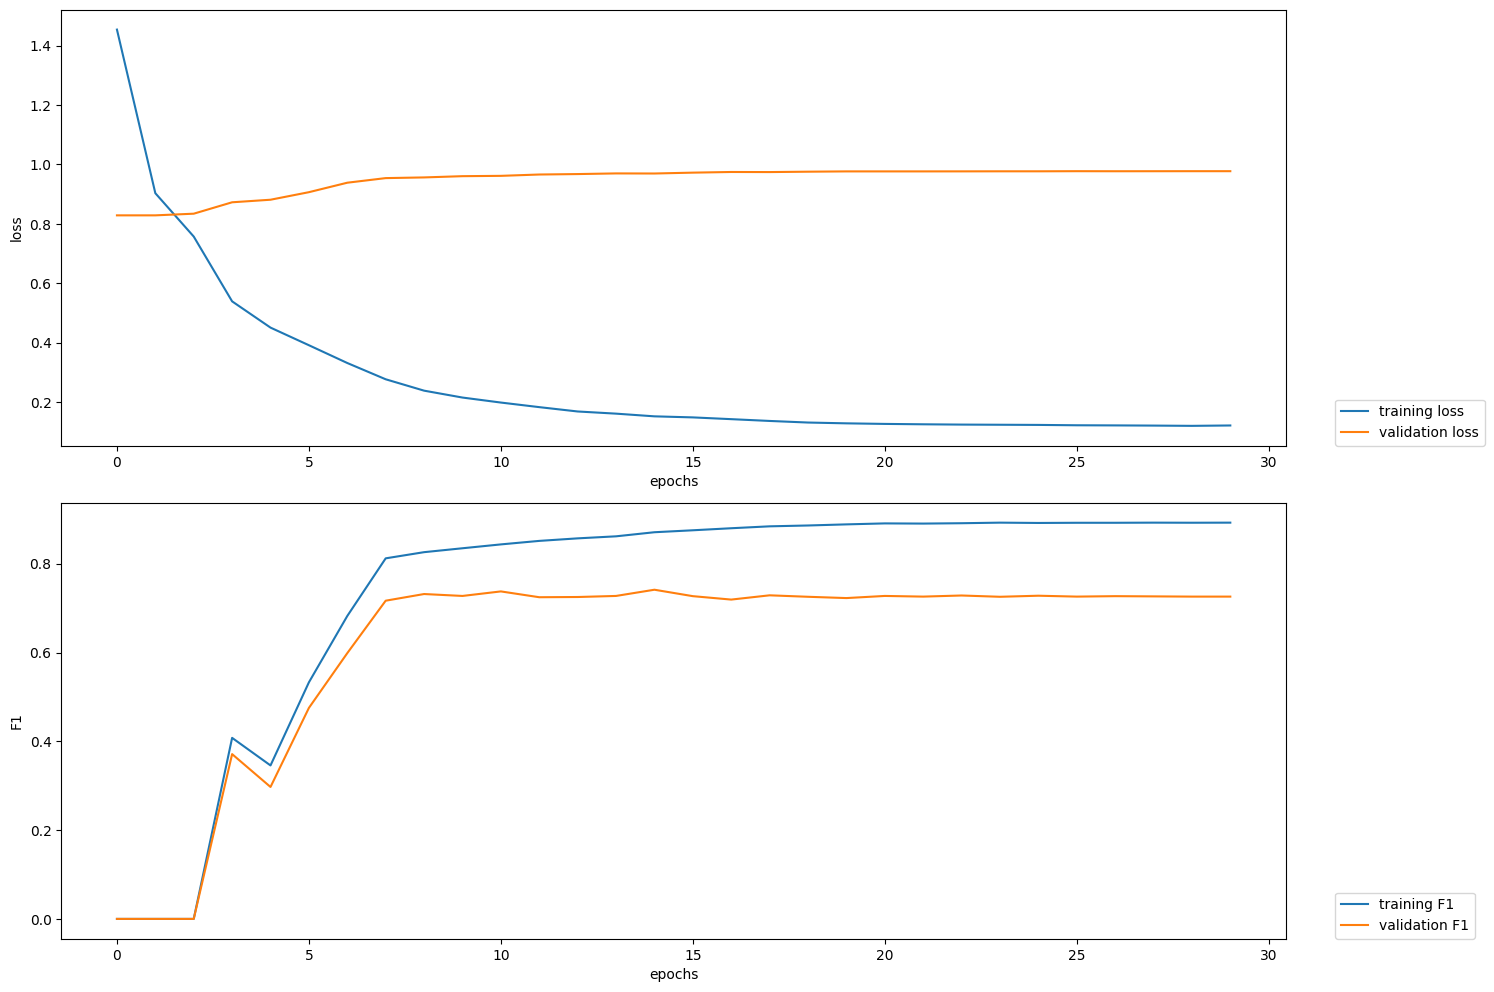

100%|██████████| 64/64 [00:24<00:00,  2.58it/s]


2023-04-21 17:08:20,894 Evaluating as a multi-label problem: True


100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

2023-04-21 17:08:27,059 Evaluating as a multi-label problem: False



100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

2023-04-21 17:08:30,304 Evaluating as a multi-label problem: True


,split,index,I-ADR,B-ADR,B-Drug,B-Finding,I-Finding,B-Disease,B-Symptom,I-Symptom,I-Disease,I-Drug,micro avg,macro avg,weighted avg,samples avg
0,train,precision,0.890591,0.866654,0.805507,0.358974,0.389262,0.276596,0.0,0.0,0.461538,0.0,0.857971,0.404912,0.806597,0.145204
1,train,recall,0.972337,0.950340,0.984957,0.317152,0.166189,0.056277,0.0,0.0,0.035503,0.0,0.875382,0.348276,0.875382,0.145167
2,train,f1-score,0.929671,0.906569,0.886239,0.336770,0.232932,0.093525,0.0,0.0,0.065934,0.0,0.866589,0.345164,0.834651,0.145180
3,train,support,7953.000000,4712.000000,1396.000000,309.000000,349.000000,231.000000,222.0,218.0,169.000000,161.0,15720.000000,15720.000000,15720.000000,15720.000000
4,dev,precision,0.699352,0.775910,0.790179,0.243243,0.190476,0.000000,0.0,0.0,0.500000,0.0,0.720038,0.319916,0.661151,NaN
5,dev,recall,0.782609,0.850998,0.961957,0.140625,0.074074,0.000000,0.0,0.0,0.071429,0.0,0.727009,0.288169,0.727009,NaN
6,dev,f1-score,0.738642,0.811722,0.867647,0.178218,0.106667,0.000000,0.0,0.0,0.125000,0.0,0.723507,0.282790,0.688418,NaN
7,dev,support,966.000000,651.000000,184.000000,64.000000,54.000000,31.000000,25.0,36.0,28.000000,27.0,2066.000000,2066.000000,2066.000000,NaN
8,test,precision,0.758920,0.781499,0.779412,0.416667,0.363636,0.000000,0.0,0.0,0.000000,0.0,0.761784,0.310013,0.698576,0.127007
9,test,recall,0.813857,0.850694,0.968037,0.192308,0.111111,0.000000,0.0,0.0,0.000000,0.0,0.755656,0.293601,0.755656,0.126922


In [17]:
print(suf)

os.mkdir('flair_ner_model'+suf+'/classification_report')
plotter.plot_training_curves('flair_ner_model'+suf+'/loss.tsv')

# evaluate the tagger on the test set
result = tagger.evaluate(corpus.train, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=15,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/train.txt', 'w').write(str(result))
res1 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res1.insert(loc=0, column='split', value='train')

result = tagger.evaluate(corpus.dev, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=15,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/dev.txt', 'w').write(str(result))
res2 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res2.insert(loc=0, column='split', value='dev')

result = tagger.evaluate(corpus.test, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=15,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/test.txt', 'w').write(str(result))
res3 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res3.insert(loc=0, column='split', value='test')

res = pd.concat([res1,res2,res3],ignore_index=True)
res.to_csv('flair_ner_model'+suf+'/classification_report.csv',index=False)
res

In [18]:
# import time
# start_time = time.time()
# while time.time() - start_time < 1:
#     time.sleep(1)
# print('Session has timed out (2 minutes). Disconnecting...')
# !kill -9 -1

Layering can be a good idea if the NER tags in the first layer have their own set of dependent values in the second layer. This can help capture more information about the entities being recognized and provide more context for downstream tasks. However, it also increases the complexity of the annotation and the training process, so it should be used judiciously. In general, it's a good idea to start with a simple tag scheme and gradually increase complexity as needed.

    does it really matter if u use the E header

It depends on the specific task and the requirements of the downstream model. In some cases, using the E tag can help disambiguate between overlapping entities, while in other cases it may not be necessary or even desired. Ultimately, it's up to the developer to determine the appropriate tagging scheme for their specific use case.

    would adding POS as an extra NER layer help model performance or not

Adding POS as an extra NER layer may or may not help model performance, depending on the specific use case and data being analyzed.

On one hand, incorporating POS tags could provide additional context to the model and help it better distinguish between named entities and other parts of speech. For example, knowing that a word is a noun or verb could help the model determine if it is likely to be a named entity or not.

On the other hand, adding an additional layer could also increase model complexity and training time without necessarily improving performance. It may also require additional manual annotation efforts to create a labeled dataset with both NER and POS tags.

Ultimately, whether to include POS as an additional layer will depend on the specific requirements and goals of the project, as well as the available data and resources.

    besides bioes ordering (which is up-to-down), it doesn't matter what order the tags in the same domain appear in left-to-right?

Yes, that is correct. As long as the BIOES order is maintained vertically, the order of tags in the same domain from left-to-right should not impact training in flai

    different typenames must be treated as separate tasks?

Yes, that's correct. Different typenames should be treated as separate tasks because they represent different types of annotations that you want to predict. For example, in a biomedical NER task, you might want to predict the entity types of both drugs and diseases, which would be represented by two different typenames in your annotation data. Predicting both types of entities would require different models and possibly different evaluation metrics.